In [1]:
from IPython.display import display

import io, re
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial as P
from scipy.linalg import solve
from scipy.spatial.distance import cosine
from functools import partial
from collections import defaultdict

# Задача 1: сравнение предложений

In [2]:
!type data\sentences.txt

In comparison to dogs, cats have not undergone major changes during the domestication process.
As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.
A common interactive use of cat for a single file is to output the content of a file to standard output.
Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.
In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.
The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.
Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).
However, if the output is piped or redirected, cat is unnecessary.
cat with one named file is safer where human error is a concern - one wrong use of the

In [3]:
lexicon = set()
text_counts = list()

# Read file with sentences.
with io.open('data/sentences.txt', 'r', encoding = 'utf-8') as data_file:
    for line in data_file:
        # For each line extract tokens and
        # count number of entries for each token in the line.
        tokens = re.split('[^a-z]', line.lower())
        line_counts = defaultdict(int)
        
        for token in tokens:
            lexicon.add(token)
            line_counts[token] += 1
        
        del line_counts['']
        text_counts.append(line_counts)

# Convert lexicon set to dict and set index for each word.
if '' in lexicon: lexicon.remove('')
idx = (i for i in xrange(len(lexicon)))
lexicon = { word: idx.next() for word in lexicon }

In [4]:
display(lexicon)

{u'a': 232,
 u'according': 98,
 u'adjacent': 211,
 u'allow': 248,
 u'allows': 97,
 u'also': 208,
 u'an': 188,
 u'ancestor': 215,
 u'and': 177,
 u'animals': 164,
 u'any': 196,
 u'app': 114,
 u'apple': 113,
 u'are': 57,
 u'arguments': 210,
 u'artificial': 67,
 u'as': 190,
 u'available': 50,
 u'based': 87,
 u'basic': 138,
 u'be': 78,
 u'between': 71,
 u'binary': 199,
 u'both': 90,
 u'by': 89,
 u'bytes': 41,
 u'can': 172,
 u'cat': 170,
 u'catenates': 106,
 u'cats': 136,
 u'changes': 107,
 u'chromosomes': 218,
 u'clear': 239,
 u'closest': 219,
 u'command': 246,
 u'commands': 91,
 u'common': 76,
 u'community': 115,
 u'comparison': 230,
 u'computers': 179,
 u'concatenate': 77,
 u'concern': 61,
 u'connected': 227,
 u'contains': 148,
 u'content': 68,
 u'count': 162,
 u'create': 130,
 u'default': 167,
 u'delete': 125,
 u'deliberately': 24,
 u'developed': 4,
 u'diploid': 84,
 u'disk': 14,
 u'displays': 93,
 u'dogs': 141,
 u'domestic': 7,
 u'domesticated': 195,
 u'domestication': 197,
 u'download'

In [5]:
display(text_counts)

[defaultdict(int,
             {u'cats': 1,
              u'changes': 1,
              u'comparison': 1,
              u'dogs': 1,
              u'domestication': 1,
              u'during': 1,
              u'have': 1,
              u'in': 1,
              u'major': 1,
              u'not': 1,
              u'process': 1,
              u'the': 1,
              u'to': 1,
              u'undergone': 1}),
 defaultdict(int,
             {u'also': 1,
              u'as': 1,
              u'be': 1,
              u'binary': 1,
              u'bytes': 2,
              u'can': 1,
              u'cat': 1,
              u'catenates': 1,
              u'concatenate': 2,
              u'files': 1,
              u'it': 2,
              u'just': 1,
              u'of': 2,
              u'sequence': 1,
              u'simply': 1,
              u'streams': 1,
              u'to': 1,
              u'used': 1,
              u'where': 1,
              u'will': 1}),
 defaultdict(int,
             {u'a': 3

In [6]:
def counts_to_feature(lexicon, line_counts):
    feature = np.zeros((len(lexicon),))
    for word, count in line_counts.iteritems():
        feature[lexicon[word]] = count
    return feature

features = np.array(map(partial(counts_to_feature, lexicon), text_counts))

In [7]:
target_feature = features[0]
dists = np.apply_along_axis(lambda feature: cosine(feature, target_feature), 1, features[1:])
display(dists.argsort()[:2])

array([5, 3], dtype=int64)

In [8]:
display(dists)

array([ 0.95275444,  0.86447381,  0.89517152,  0.77708871,  0.94023857,
        0.73273876,  0.92587507,  0.88427249,  0.90550888,  0.83281654,
        0.88047714,  0.83964325,  0.87035926,  0.87401184,  0.94427218,
        0.84063619,  0.9566445 ,  0.94427218,  0.88854436,  0.84275727,
        0.82503645])

# Задача 2: аппроксимация функции

In [9]:
%matplotlib inline

def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

x = np.arange(-1, 16, 0.1)
x1 = np.array([[1, 15]], dtype = float).T
x2 = np.array([[1, 8, 15]], dtype = float).T
x3 = np.array([[1, 4, 10, 15]], dtype = float).T

b1 = f(x1)
b2 = f(x2)
b3 = f(x3)

A1 = np.concatenate((np.ones((x1.size, 1)), x1), axis = 1)
A2 = np.concatenate((np.ones((x2.size, 1)), x2, x2 ** 2), axis = 1)
A3 = np.concatenate((np.ones((x3.size, 1)), x3, x3 ** 2, x3 ** 3), axis = 1)

display(x1, x2, x3)
display(b1, b2, b3)
display(A1, A2, A3)

array([[  1.],
       [ 15.]])

array([[  1.],
       [  8.],
       [ 15.]])

array([[  1.],
       [  4.],
       [ 10.],
       [ 15.]])

array([[ 3.25221687],
       [ 0.63522142]])

array([[ 3.25221687],
       [ 2.31617016],
       [ 0.63522142]])

array([[ 3.25221687],
       [ 1.74684595],
       [ 2.50541641],
       [ 0.63522142]])

array([[  1.,   1.],
       [  1.,  15.]])

array([[   1.,    1.,    1.],
       [   1.,    8.,   64.],
       [   1.,   15.,  225.]])

array([[  1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          1.00000000e+00],
       [  1.00000000e+00,   4.00000000e+00,   1.60000000e+01,
          6.40000000e+01],
       [  1.00000000e+00,   1.00000000e+01,   1.00000000e+02,
          1.00000000e+03],
       [  1.00000000e+00,   1.50000000e+01,   2.25000000e+02,
          3.37500000e+03]])

In [10]:
c1 = solve(A1, b1)
c2 = solve(A2, b2)
c3 = solve(A3, b3)

display(c1, c2, c3)

array([[ 3.43914511],
       [-0.18692825]])

array([[ 3.32512949],
       [-0.06531159],
       [-0.00760104]])

array([[ 4.36264154],
       [-1.29552587],
       [ 0.19333685],
       [-0.00823565]])

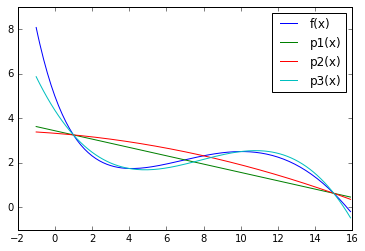

In [11]:
p1 = P(c1.ravel())
p2 = P(c2.ravel())
p3 = P(c3.ravel())

plt.plot(x, f(x), '-', x, p1(x), '-', x, p2(x), '-', x, p3(x), '-')
plt.legend(('f(x)', 'p1(x)', 'p2(x)', 'p3(x)'), loc = 'upper right')
plt.show()